In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Load dataset 

df = pd.read_csv('./Datasets/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


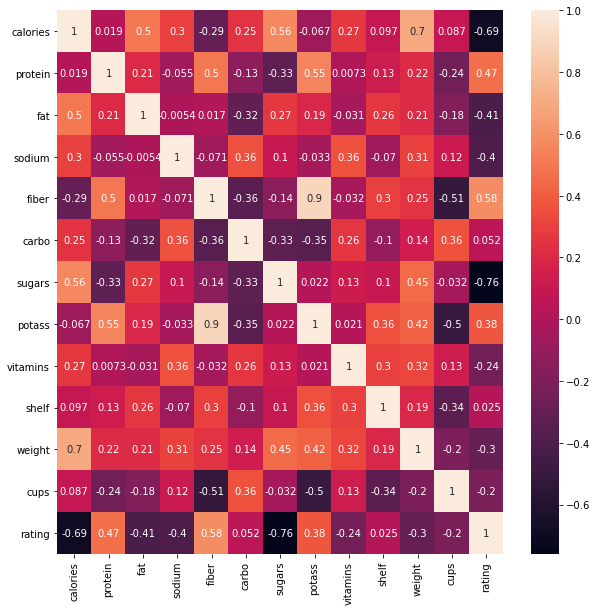

In [3]:
# Correlation between variables

corr_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

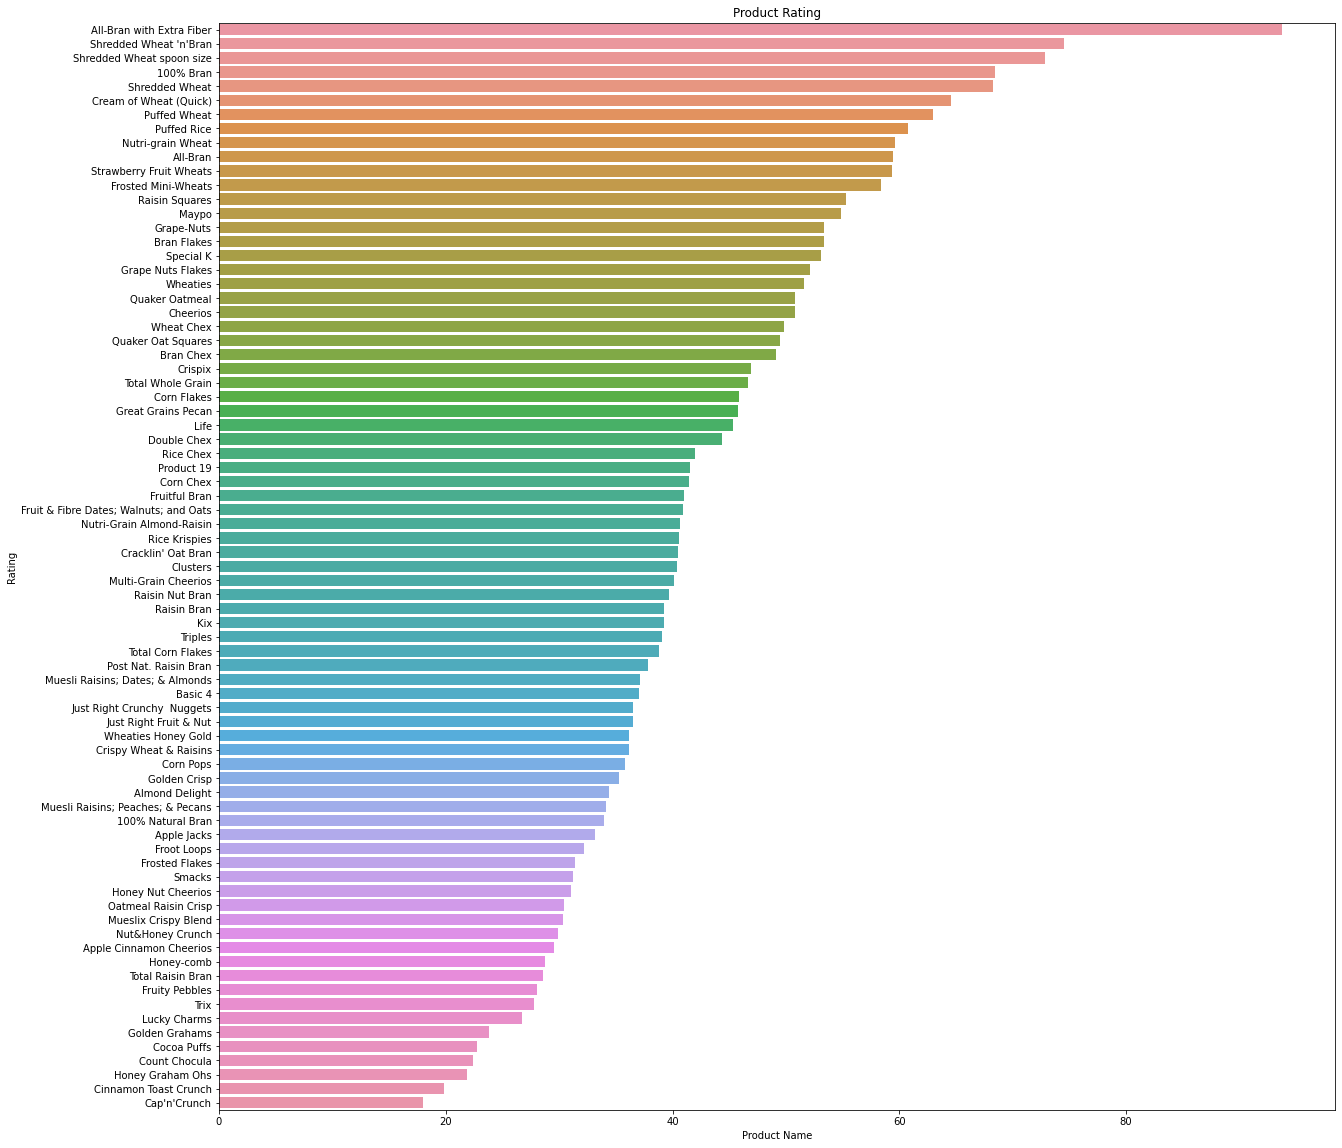

In [7]:
df = df.sort_values(['rating'], ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["rating"], y=df["name"])
plt.xlabel("Product Name")
plt.ylabel("Rating")
plt.title("Product Rating")
plt.show()

In [3]:
# Split dataset

df.replace({'C': 1, 'H': 0}, inplace=True)

x = np.array(df.drop(['name', 'mfr', 'rating'], axis=1))
y = np.array(df['rating'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [4]:
# Linear Regression

from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_prediction = linearRegression.predict(x_test)

In [5]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor()
decisionTree.fit(x_train, y_train)
y_prediction = decisionTree.predict(x_test)

In [6]:
# Plotting accuracy

accuracy = [
    linearRegression.score(x_test, y_test),
    decisionTree.score(x_test, y_test)    
]

result_df = pd.DataFrame(list(zip(accuracy)),columns=['accuracy'], 
                         index=['Linear_Regression', 'Decision_Tree_Regressor'])

result_df

,accuracy
Linear_Regression,1.000000
Decision_Tree_Regressor,0.026956
